# **Analyzing Amazon Sales data**




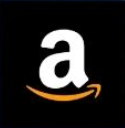
**This project originates from the e-commerce domain, focusing on analyzing Amazon's sales data. The goal is to uncover key metrics and insights to address our business challenges effectively.**

## **Problem Statement:**
**Sales** **management** **has** **gained** **importance** **to** **meet** **increasing** **competition** **and** **the**
**need** **for** **improved** **methods** **of** **distribution** **to** **reduce** **cost** **and** **to** **increase** **profits**. **Sales**
**management** **today** **is** **the** **most** **important** **function** **in** **a** **commercial** **and** **business**.



Now let us start working on a dataset in our google colab. The first step is to **import the libraries** and load data.

In [ ]:
import numpy as np         #Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays.
import pandas as pd                  # Pandas is used for data manipulation and analysis.
import matplotlib.pyplot as plt      # matplotlib and seaborn are help to visulize the data
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Amazon_sales_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon Sales data (1).csv")   # loading dataset

**DATA UNDERSTANDING AND CLEANING**

In [ ]:
Amazon_sales_data.head()           # it gives top 5 rows of dataset

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
Amazon_sales_data.tail()           # it gives bottom 5 rows of dataset.

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [ ]:
Amazon_sales_data .shape          # it gives number of rows and columns of dataset.

(100, 14)

In [ ]:
Amazon_sales_data.columns            # it gives columns of dataset.

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')




*   **The dataset consists of 100 rows and 14 columns.**
*   **It** **includes** **detailed** **sales** **records** **for** **various** **products** **across** **different** **regions** **and** **countries**.

*   **Sales** **data** **is** **captured** **for** **both** **online** **and** **offline** **channels**.
*   **Key** **financial** **metrics** **such** **as** **Total** **Revenue**, **Total** **Cost**, **and** **Total** **Profit** **are** **included**.


*   **The** **dataset** **covers** **a** **range** **of** **dates**, **with** **order** **and** **ship** **dates** **specified** **for** **each** **sale**.


















In [ ]:
Amazon_sales_data.info()           # it gives non_null count and data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


Based on the data types inferred from the dataset, some changes are necessary to ensure proper data analysis, particularly for date columns.
**Order Date and Ship Date columns are currently of type object. These should be converted to datetime type.**

In [ ]:
Amazon_sales_data['Order Date'] = pd.to_datetime(Amazon_sales_data['Order Date'])
Amazon_sales_data['Ship Date'] = pd.to_datetime(Amazon_sales_data['Ship Date'])

In [ ]:
# Checking the data types of "Order Date" and "Ship Date" columns
print(Amazon_sales_data['Order Date'].dtype)
print(Amazon_sales_data['Ship Date'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
Amazon_sales_data.describe()           # it gives statistical summary of dataset.

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [ ]:
Amazon_sales_data.describe(include="O")           # it gives statistical summary of categorical data.

,Region,Country,Item Type,Sales Channel,Order Priority
count,100,100,100,100,100
unique,7,76,12,2,4
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H
freq,36,4,13,50,30


In [ ]:
Amazon_sales_data.isnull().sum()           # it gives count of null values in each column.

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

**There are no null values in any of the columns**.








In [ ]:
Amazon_sales_data.duplicated().sum()           # it gives count of duplicate values.

0

**There are no duplicate rows in this data set.**

In [ ]:
Amazon_sales_data["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [ ]:
Amazon_sales_data['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

In [ ]:
Amazon_sales_data["Region"].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [ ]:
Amazon_sales_data["Country"].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [ ]:
Amazon_sales_data["Order Priority"].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

In [ ]:
Amazon_sales_data["Order Day"]=Amazon_sales_data["Order Date"].dt.day
Amazon_sales_data['Order Month'] = Amazon_sales_data['Order Date'].dt.month # Extract Day , Month and Year from "Order Date"
Amazon_sales_data['Order Year'] = Amazon_sales_data['Order Date'].dt.year

Amazon_sales_data["Ship day"]=Amazon_sales_data["Ship Date"].dt.day      # Extract Day , Month and Year from "Ship Date"
Amazon_sales_data["Ship Month"]=Amazon_sales_data["Ship Date"].dt.month
Amazon_sales_data["Ship Year"]=Amazon_sales_data["Ship Date"].dt.year


In [ ]:
Amazon_sales_data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Day,Order Month,Order Year,Ship day,Ship Month,Ship Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,28,5,2010,27,6,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,22,8,2012,15,9,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2,5,2014,8,5,2014


**Average Order Value**

In [ ]:
Amazon_sales_data['Order value']=Amazon_sales_data['Units Sold']*Amazon_sales_data['Unit Price']
aov=Amazon_sales_data['Order value'].mean()
print("Average Order Value(AOV): ",aov)

Average Order Value(AOV):  1373487.6831


**Average Profit Margin for the entire dataset**

In [ ]:
# Calculate Profit Margin for each order
Amazon_sales_data['Profit_margin'] = (Amazon_sales_data['Total Profit'] / Amazon_sales_data['Total Revenue']) * 100

# Calculate Average Profit Margin for the entire dataset
avg_profit_margin = Amazon_sales_data['Profit_margin'].mean()
print("Average Profit Margin Percentage For The Entire Dataset is:", avg_profit_margin, "%")


Average Profit Margin Percentage For The Entire Dataset is: 36.21162285657073 %


## **SQL Queries for Amazon Sales Data Analysis**

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('Amazon_sales_data',Amazon_sales_data)

In [ ]:
conn.execute("""
SELECT
    SUM("Units Sold") AS Total_Sales,
    AVG("Units Sold") AS Avg_Sales,
    SUM("Total Profit") AS Total_Profit,
    AVG("Total Profit") AS Avg_Profit,
    SUM("Total Cost") AS Total_Cost,
    AVG("Total Cost") AS Avg_Cost,
    SUM("Total Revenue") AS Total_Revenue,
    AVG("Total Revenue") AS Avg_Revenue
FROM Amazon_sales_data
""").fetchdf()


,Total_Sales,Avg_Sales,Total_Profit,Avg_Profit,Total_Cost,Avg_Cost,Total_Revenue,Avg_Revenue
0,512871.0,5128.71,44168198.4,441681.984,93180569.91,931805.6991,1.373488e+08,1.373488e+06


### **Q: What are the trends in monthly sales and revenue?**

In [ ]:
conn.execute("""
SELECT
    EXTRACT(YEAR FROM "Order Date") AS Order_Year,
    EXTRACT(MONTH FROM "Order Date") AS Order_Month,
    SUM("Units Sold") AS Monthly_Sales,
    SUM("Total Revenue") AS Monthly_Revenue
FROM Amazon_sales_data
GROUP BY Order_Year, Order_Month
ORDER BY Order_Year, Order_Month;
""").fetchdf()


,Order_Year,Order_Month,Monthly_Sales,Monthly_Revenue
0,2010,2,9503.0,3410661.12
1,2010,5,15747.0,2587973.26
2,2010,6,9905.0,1082418.40
3,2010,10,14403.0,6064933.75
4,2010,11,7910.0,3458252.00
5,2010,12,4103.0,2581786.39
6,2011,1,12914.0,1042225.35
7,2011,2,8156.0,387002.20
8,2011,4,4187.0,2798046.49
9,2011,5,5741.0,272410.45


### **Q:How do sales and revenue vary year-over-year ?**

In [ ]:
conn.execute("""
SELECT
    EXTRACT(YEAR FROM "Order Date") AS Year,
    SUM("Units Sold") AS Yearly_Sales,
    SUM("Total Revenue") AS Yearly_Revenue
FROM Amazon_sales_data
GROUP BY Year
ORDER BY Year;

""").fetchdf()


,Year,Yearly_Sales,Yearly_Revenue
0,2010,61571.0,19186024.92
1,2011,54768.0,11129166.07
2,2012,97967.0,31898644.52
3,2013,64663.0,20330448.66
4,2014,92040.0,16630214.43
5,2015,49480.0,12427982.86
6,2016,43156.0,12372867.22
7,2017,49226.0,13373419.63


### **Q:What are the key Sales ,revenue and profit drivers by region and item type?**

In [ ]:
conn.execute("""
SELECT
    "Region",
    "Item Type",
    SUM("Units Sold") AS Total_Sales,
    SUM("Total Revenue") AS Total_Revenue,
    SUM("Total Profit") AS Total_Profit
FROM Amazon_sales_data
GROUP BY "Region", "Item Type"
ORDER BY Total_Revenue DESC, Total_Profit DESC ,Total_Sales DESC;
""").fetchdf()


,Region,Item Type,Total_Sales,Total_Revenue,Total_Profit
0,Europe,Cosmetics,30100.0,13159720.00,5233487.00
1,Sub-Saharan Africa,Office Supplies,16251.0,10582813.71,2051688.75
2,Middle East and North Africa,Cosmetics,23615.0,10324478.00,4105940.05
3,Europe,Office Supplies,14053.0,9151454.13,1774191.25
4,Asia,Household,12080.0,8072701.60,2002018.40
5,Sub-Saharan Africa,Household,11924.0,7968451.48,1976164.52
6,Asia,Office Supplies,11718.0,7630878.78,1479397.50
7,Central America and the Caribbean,Household,8974.0,5997054.98,1487261.02
8,Europe,Baby Food,22087.0,5638369.36,2117259.82
9,Sub-Saharan Africa,Cosmetics,11692.0,5111742.40,2032888.04


### **Q:How is revenue distributed across different order priorities?**

In [ ]:
conn.execute("""
SELECT
    "Order Priority",
    SUM("Total Revenue") AS Total_Revenue
FROM Amazon_sales_data
GROUP BY "Order Priority"
ORDER BY Total_Revenue DESC;
""").fetchdf()

,Order Priority,Total_Revenue
0,H,48749546.05
1,L,36628127.46
2,M,33116031.75
3,C,18855063.05


### **Q:Which countries contribute the most to Amazon's revenue?**

In [ ]:
conn.execute("""
SELECT
    "Country",
    SUM("Total Revenue") AS Total_Revenue
FROM Amazon_sales_data
GROUP BY "Country"
ORDER BY Total_Revenue DESC
LIMIT 10;
""").fetch_df()



,Country,Total_Revenue
0,Honduras,6336545.48
1,Myanmar,6161257.90
2,Djibouti,6052890.86
3,Turkmenistan,5822036.20
4,Mexico,5643356.55
5,The Gambia,5449517.95
6,Lithuania,5396577.27
7,Rwanda,5253769.42
8,Azerbaijan,4478800.21
9,Brunei,4368316.68


### **Q:What is the cost structure, and how can costs be reduced to increase profitability?**

In [ ]:
conn.execute("""
SELECT
    "Region",
    "Item Type",
    SUM("Total Cost") AS Total_Cost,
    SUM("Total Profit") AS Total_Profit,
    SUM("Total Revenue") AS Total_Revenue
FROM Amazon_sales_data
GROUP BY "Region", "Item Type"
ORDER BY Total_Profit DESC;
""").fetchdf()

,Region,Item Type,Total_Cost,Total_Profit,Total_Revenue
0,Europe,Cosmetics,7926233.00,5233487.00,13159720.00
1,Middle East and North Africa,Cosmetics,6218537.95,4105940.05,10324478.00
2,Europe,Baby Food,3521109.54,2117259.82,5638369.36
3,Sub-Saharan Africa,Office Supplies,8531124.96,2051688.75,10582813.71
4,Sub-Saharan Africa,Cosmetics,3078854.36,2032888.04,5111742.40
5,Asia,Household,6070683.20,2002018.40,8072701.60
6,Sub-Saharan Africa,Household,5992286.96,1976164.52,7968451.48
7,Europe,Office Supplies,7377262.88,1774191.25,9151454.13
8,Australia and Oceania,Cosmetics,2542187.82,1678540.98,4220728.80
9,Sub-Saharan Africa,Cereal,2146392.08,1623677.52,3770069.60


# **Visualization of the Amazon dataset using Matplotlib and Seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


### **Identify Outliers Using Boxplot**

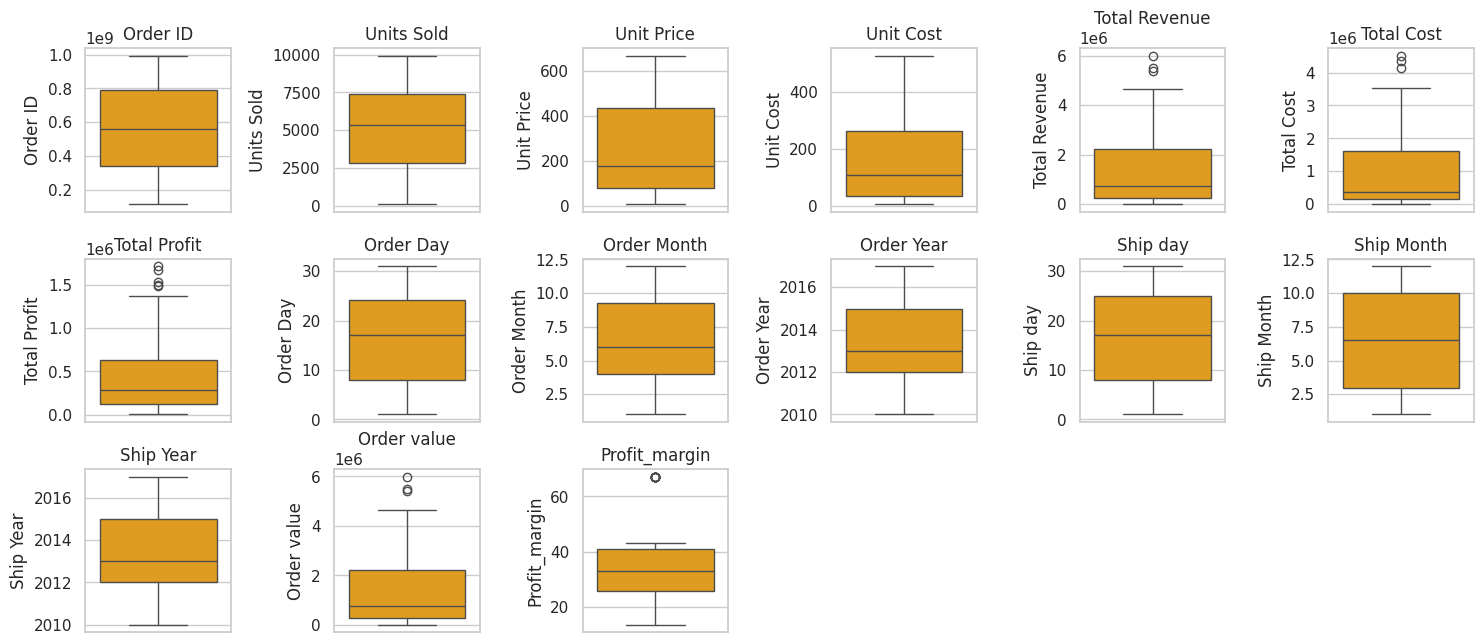

In [ ]:
# Select only the numerical columns
numerical_columns = Amazon_sales_data.select_dtypes(include=['float', 'int']).columns

# Set up the figure
plt.figure(figsize=(15, 15))

# Create subplots for each numerical variable
for i, var in enumerate(numerical_columns):
    plt.subplot(7, 6, i + 1)  # Adjust the grid size (7, 6) as needed
    sns.boxplot(data=Amazon_sales_data, y=var,color="orange")
    plt.title(var)

plt.tight_layout()
plt.show()

**Observations :**

Upon examining the box plots for the numerical variables in our Amazon sales dataset, it is evident that there are outliers present in the "Total Revenue," "Total Cost," and "Total Profit" columns. These outliers represent unusually high values compared to the rest of the data.
While outliers often indicate data points that deviate significantly from the norm, in the context of sales data, they are not necessarily anomalies that need to be removed. Instead, these high values are crucial for a comprehensive analysis of sales performance and profitability.

In [ ]:
# Create a copy of the dataset
Amazon_sales_data_copy = Amazon_sales_data.copy()

# Convert categorical columns to numerical using encoding techniques
# For simplicity, we will use label encoding for this example
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    Amazon_sales_data_copy[column] = label_encoder.fit_transform(Amazon_sales_data_copy[column])

**Calculate the correlation matrix for all columns**

In [ ]:
Amazon_sales_data_copy.corr()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Cost,Total Profit,Order Day,Order Month,Order Year,Ship day,Ship Month,Ship Year,Order value,Profit_margin
Region,1.000000,0.090381,0.086903,-0.084149,0.088160,-0.027527,0.116983,-0.031119,-0.058390,-0.054337,...,-0.127484,-0.137036,-0.147256,-0.152892,-0.005085,0.144915,-0.205356,-0.003980,-0.135806,-0.039016
Country,0.090381,1.000000,0.016516,-0.143683,0.058582,-0.073075,0.083332,-0.072690,-0.076610,0.069421,...,0.022350,0.008522,0.009951,0.125203,-0.089590,0.079597,-0.059142,-0.066073,0.019152,-0.247111
Item Type,0.086903,0.016516,1.000000,0.047309,0.236258,-0.014985,-0.022389,-0.017681,-0.237976,0.206581,...,0.131500,-0.129872,-0.109738,0.033670,-0.018200,0.078800,-0.127728,-0.000787,0.058618,-0.397457
Sales Channel,-0.084149,-0.143683,0.047309,1.000000,0.161422,-0.000411,0.004590,-0.000199,-0.146353,-0.144871,...,-0.140635,-0.130019,0.104997,-0.047954,0.004813,-0.052388,0.037299,-0.004893,-0.143462,0.036780
Order Priority,0.088160,0.058582,0.236258,0.161422,1.000000,-0.079675,-0.081380,-0.078790,-0.073288,0.179228,...,0.147566,0.058548,0.063107,-0.091695,-0.067682,-0.045670,-0.141260,-0.058957,0.127140,-0.163294
Order Date,-0.027527,-0.073075,-0.014985,-0.000411,-0.079675,1.000000,0.068436,0.999812,0.011993,-0.067132,...,-0.053604,0.009523,-0.036196,0.029971,0.990581,0.061315,0.126219,0.990524,-0.036936,0.013248
Order ID,0.116983,0.083332,-0.022389,0.004590,-0.081380,0.068436,1.000000,0.070476,-0.222907,-0.190941,...,-0.328944,-0.234638,0.110501,-0.111219,0.081752,0.041866,-0.046043,0.077216,-0.314688,0.186907
Ship Date,-0.031119,-0.072690,-0.017681,-0.000199,-0.078790,0.999812,0.070476,1.000000,0.011021,-0.068445,...,-0.054315,0.009683,-0.034918,0.033563,0.989899,0.064105,0.130600,0.990061,-0.037415,0.016230
Units Sold,-0.058390,-0.076610,-0.237976,-0.146353,-0.073288,0.011993,-0.222907,0.011021,1.000000,-0.070486,...,0.374746,0.564550,0.041945,-0.007995,0.012455,-0.000840,0.123650,-0.006395,0.447784,0.080699
Unit Price,-0.054337,0.069421,0.206581,-0.144871,0.179228,-0.067132,-0.190941,-0.068445,-0.070486,1.000000,...,0.787905,0.557365,-0.074471,-0.031917,-0.061791,-0.048902,-0.096844,-0.054972,0.752360,-0.435504


### **Correlation between features by using Heat map**

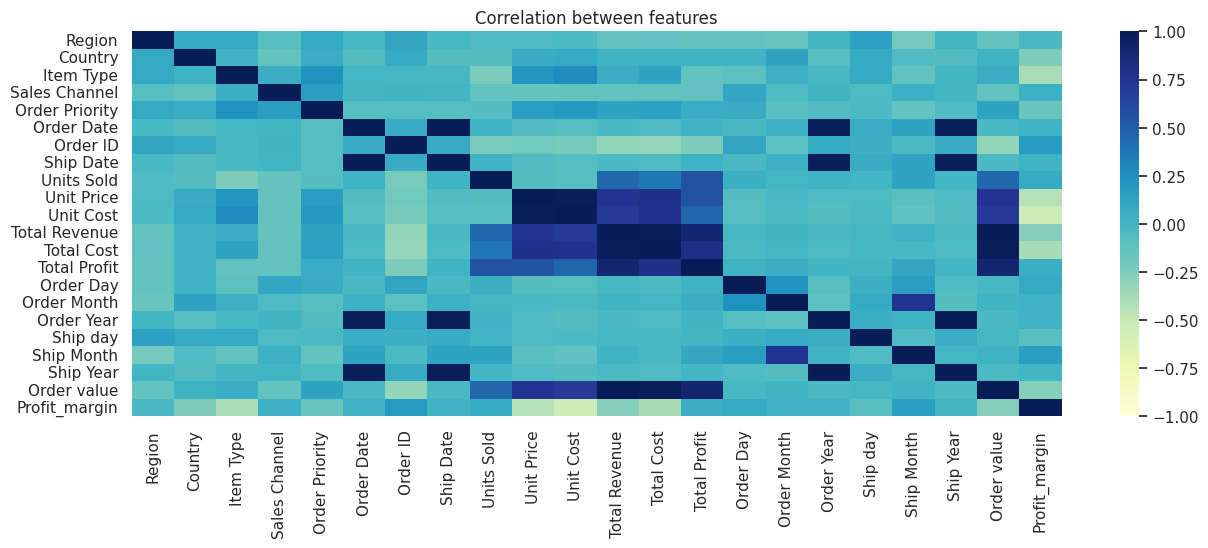

In [ ]:
corr = Amazon_sales_data_copy.corr()
plt.figure(figsize=(15, 5))

## plotting the heat map
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()

**Observations :**



*   There is a nearly perfect positive correlation between 'Order Date' and 'Ship Date'.
*   'Total Revenue' has a very high positive correlation with 'Total Cost' and 'Total Profit'. Similarly, 'Total Cost' also shows a strong positive correlation with 'Total Profit'


*   There is a strong positive correlation between 'Unit Price' and 'Unit Cost'.
*   Order ID' shows a moderate positive correlation with 'Order Date' and 'Ship Date'.

*  'Units Sold' shows a moderate positive correlation with 'Total Revenue', 'Total Cost', and 'Total Profit'.
*   'Item Type' and 'Order Priority' have a moderate positive correlation.


*    'Region' shows low correlations with most other variables, indicating that it does not have a strong linear relationship with them.
*   'Country' also shows low correlations with other variables, similar to 'Region'.

*   Sales Channel' has low or negligible correlations with most other variables.
*   Order Year and Ship Year: 'Order Year' and 'Ship Year' show a strong positive correlation.

*  'Profit Margin' does not show strong correlations with many variables, indicating it might be influenced by a more complex set of factors rather than any single variable.


*   'Order Value' shows strong positive correlations with 'Total Revenue' and 'Total Profit'.
















### **Monthly Sales Trends**

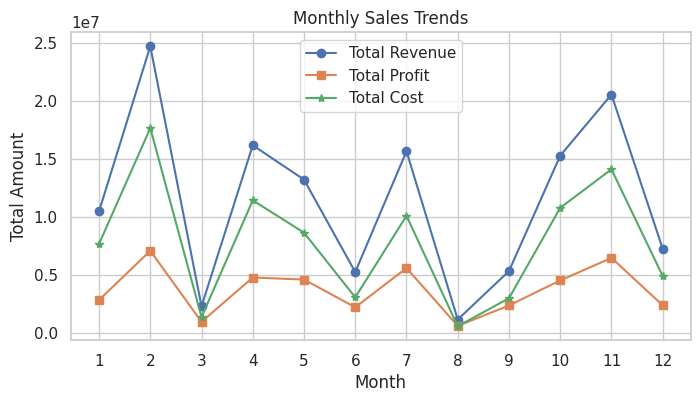

In [ ]:
# Aggregrating data for monthly sales
monthly_sales=Amazon_sales_data.groupby("Order Month").agg({"Total Cost":"sum","Total Revenue":"sum","Total Profit":"sum",}).reset_index()

# Visualizing Monthly Sales Trends

plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Order Month'],monthly_sales['Total Revenue'],marker='o',label='Total Revenue')
plt.plot(monthly_sales['Order Month'],monthly_sales['Total Profit'],marker='s',label='Total Profit')
plt.plot(monthly_sales['Order Month'],monthly_sales['Total Cost'],marker='*',label='Total Cost')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Sales Trends")
plt.legend()
plt.grid(True)
plt.xticks(monthly_sales['Order Month'])
plt.show()


**Observations :**



*  February and November: Sales experience significant increases.
*   March and August: Sales see marked decreases.



### **Yearly Sales Trends**

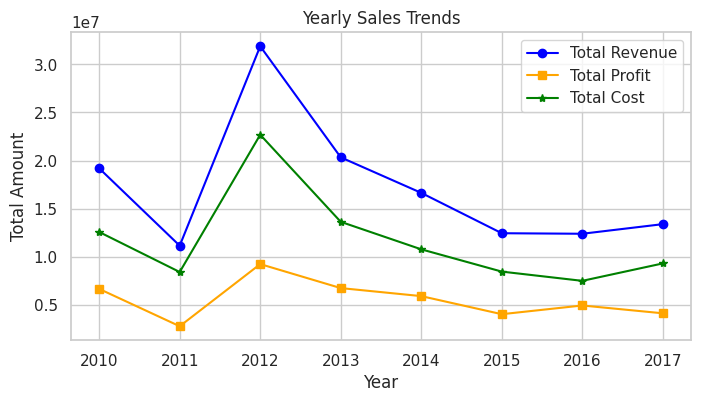

In [ ]:
# Aggregrating data for yearly sales
yearly_sales=Amazon_sales_data.groupby("Order Year").agg({"Total Cost":"sum","Total Revenue":"sum","Total Profit":"sum"}).reset_index()

# Visualizing Yearly Sales Trends

plt.figure(figsize=(8,4))
plt.plot(yearly_sales['Order Year'],yearly_sales['Total Revenue'],marker='o',label='Total Revenue',color='blue')
plt.plot(yearly_sales['Order Year'],yearly_sales['Total Profit'],marker='s',label='Total Profit',color = "orange")
plt.plot(yearly_sales['Order Year'],yearly_sales['Total Cost'],marker='*',label='Total Cost',color='green')
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.title("Yearly Sales Trends")
plt.legend()
plt.grid(True)
plt.xticks(yearly_sales['Order Year'])
plt.show()


**Observations :**



*   Sales reached their peak in 2012.
*   The lowest sales were recorded in 2011.



In [ ]:
# Extracting Year_Month From Order Date
Amazon_sales_data['Order_Year_Month']=Amazon_sales_data['Order Date'].dt.to_period('M')
Amazon_sales_data['Order_Year_Month']=Amazon_sales_data['Order_Year_Month'].astype(str)

### **Year and Month Wise Sales Trends**

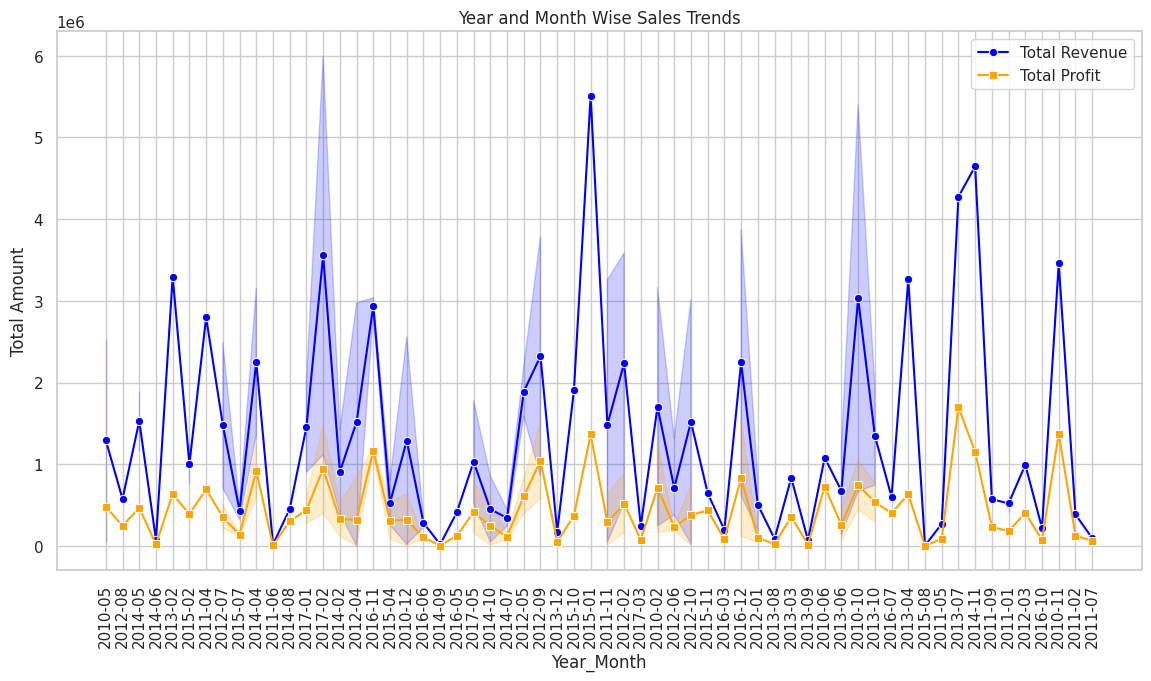

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=Amazon_sales_data,x="Order_Year_Month",y="Total Revenue",marker='o',color='blue',label="Total Revenue")
sns.lineplot(data=Amazon_sales_data,x="Order_Year_Month",y="Total Profit",marker='s',color='orange',label="Total Profit")
plt.xticks(rotation=90)
plt.xlabel("Year_Month")
plt.ylabel("Total Amount")
plt.legend()
plt.grid(True)
plt.title("Year and Month Wise Sales Trends")
plt.show()

**Observations:**

Sales reached their peaks in November 2015, July 2013, and November 2014

In [ ]:
# Aggregate data by Region and Item Type
agg_data = Amazon_sales_data.groupby(['Region', 'Item Type']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()


### **Total Revenue by Region and Item Type**

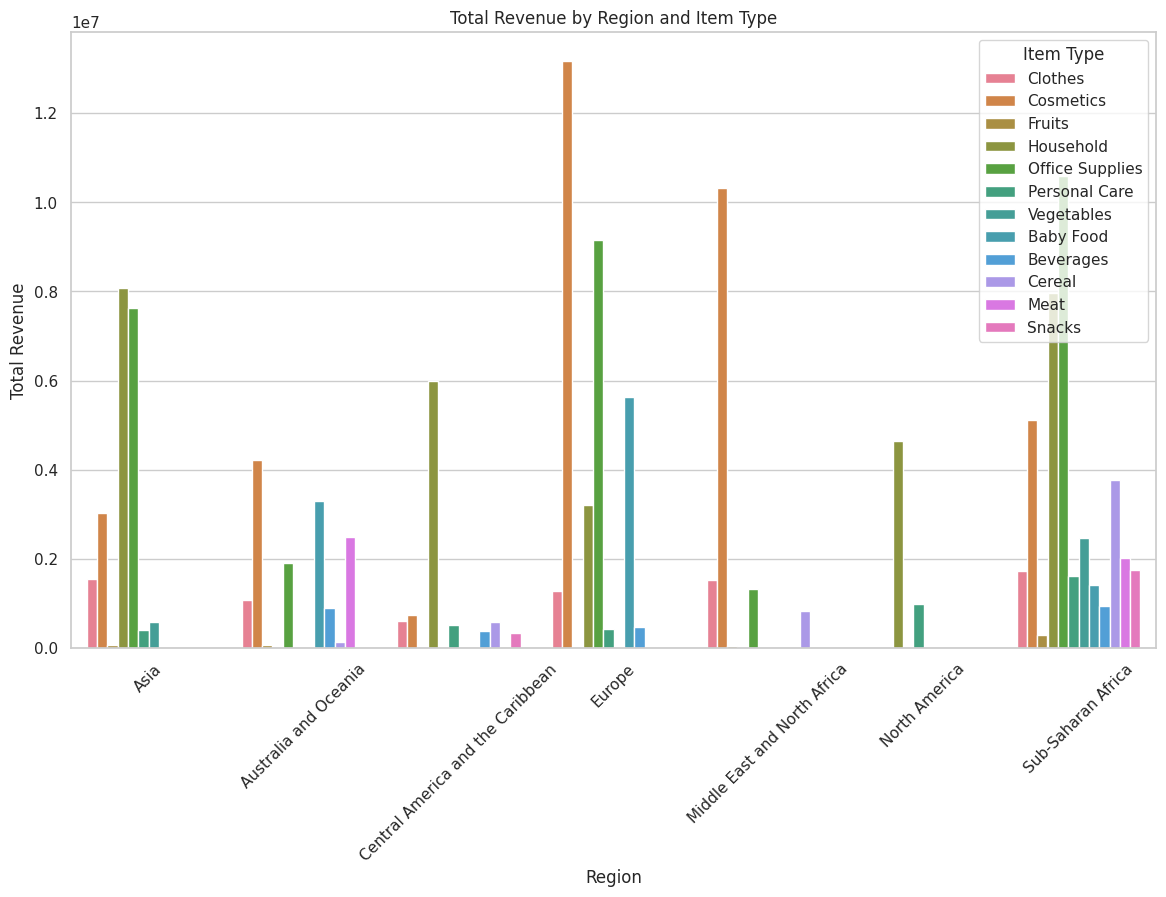

In [ ]:
# Set up the seaborn theme
sns.set_theme(style="whitegrid")

# Plot Total Revenue by Region and Item Type
plt.figure(figsize=(14, 8))
revenue_plot = sns.barplot(data=agg_data, x='Region', y='Total Revenue', hue='Item Type', ci=None)
plt.title('Total Revenue by Region and Item Type')
plt.xticks(rotation=45)
plt.show()

**Observations :**



*   Household items and office supplies are major contributors to the total revenue in Asia.
*   In Australia and Oceania, cosmetics, snacks, and beverages are major contributors to the total revenue.


* In Central America and the Caribbean, only fruits contribute significantly to the revenue.
*   In Europe, cosmetics contribute the most to the total revenue, followed by office supplies.


*   In the Middle East and North Africa, cosmetics are the primary contributors to the total revenue.
*   In North America, household items contribute the most to the total revenue.


*   In Sub-Saharan Africa, household items and office supplies are the major contributors to the total revenue.









### **Total Profit by Region and Item Type**

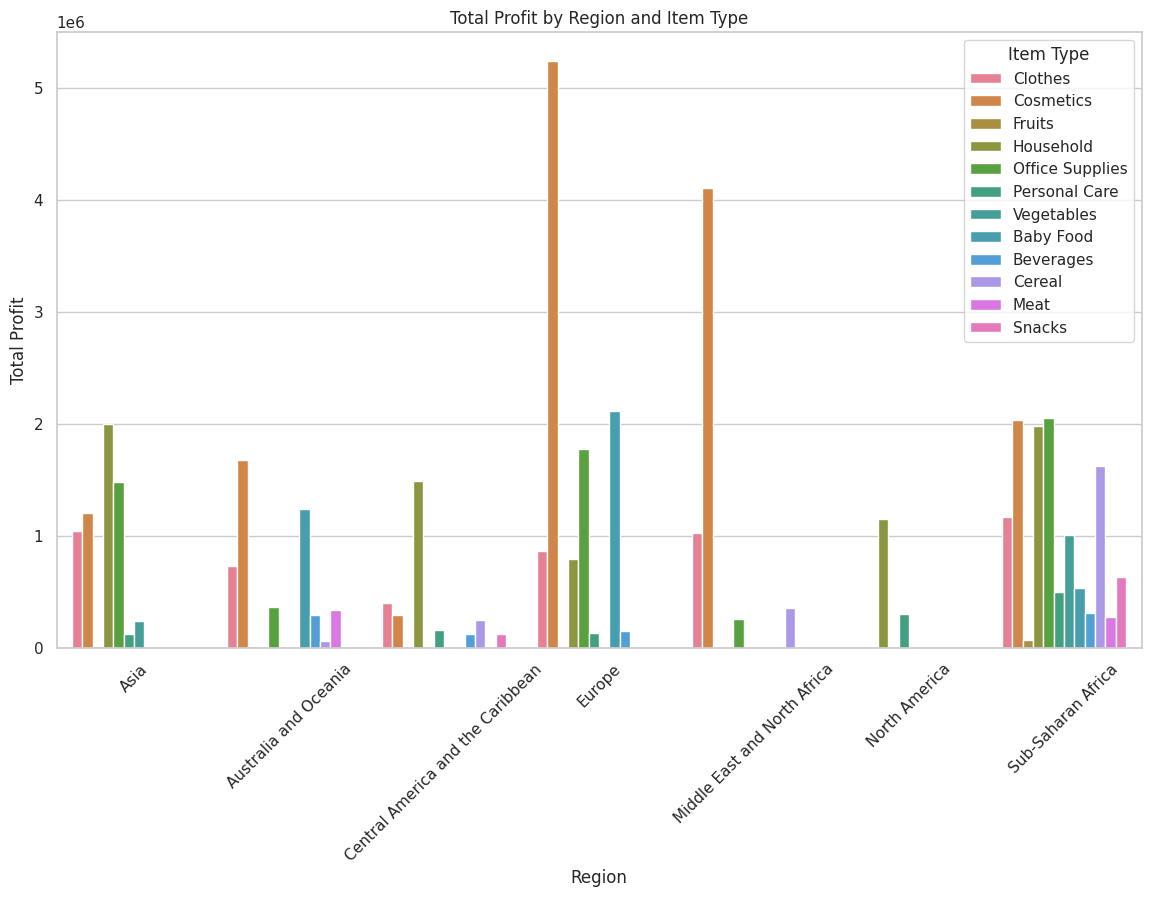

In [ ]:
# Plot Total Profit by Region and Item Type
plt.figure(figsize=(14, 8))
profit_plot = sns.barplot(data=agg_data, x='Region', y='Total Profit', hue='Item Type', ci=None)
plt.title('Total Profit by Region and Item Type')
plt.xticks(rotation=45)
plt.show()

**Observations :**



*   Household items and office supplies are major contributors to the total profit in Asia.
*   In Australia and Oceania, cosmetics and beverages are major contributors to the total profit.


*   In Central America and the Caribbean, only household contribute significantly to the profit.
*   In Europe, cosmetics contribute the most to the total profit.
*  In the Middle East and North Africa, cosmetics are the primary contributors to the total profit.

*   In North America, household items contribute the most to the total profit.
*  In Sub-Saharan Africa,Cosmetics, household items and office supplies are the major contributors to the total profit.





### **Units Sold by Region and Item Type**

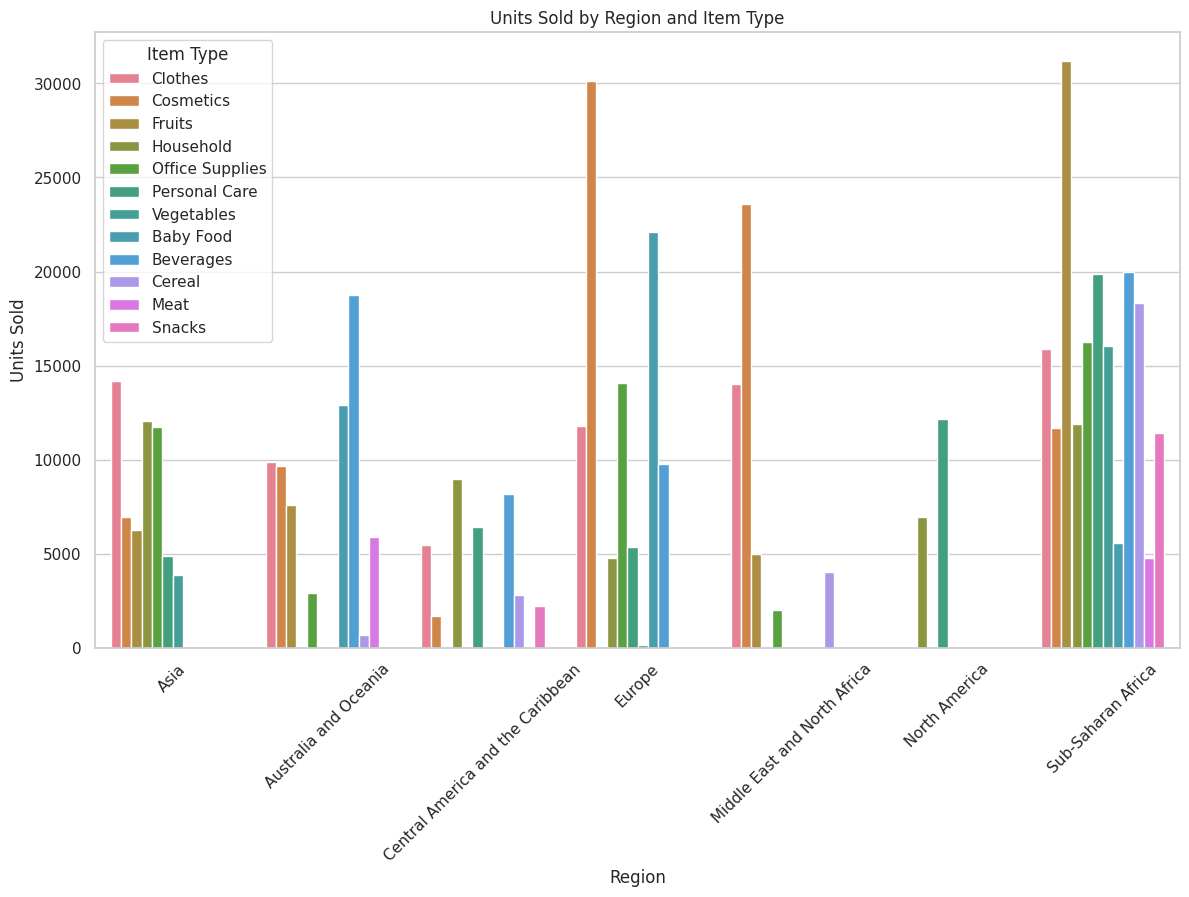

In [ ]:
# Plot Units Sold by Region and Item Type
plt.figure(figsize=(14, 8))
sales_plot = sns.barplot(data=agg_data, x='Region', y='Units Sold', hue='Item Type', ci=None)
plt.title('Units Sold by Region and Item Type')
plt.xticks(rotation=45)
plt.show()

**Observations :**





*   In Asia, snacks, household items, and office supplies have the highest units sold.
*   In Australia and Oceania, beverages have the highest sales.
*  In Central America and the Caribbean, household items and beverages have the highest sales.
*   In Europe, cosmetics have the highest sales, followed by beverages.
*  In the Middle East and North Africa, cosmetics have the highest sales, followed by snacks.
*   In North America, vegetables are the leading sales category.
*   In Sub-Saharan Africa, cosmetics have the highest sales, followed by vegetables and beverages.
























### **Total Revenue By Generated By Each Country**

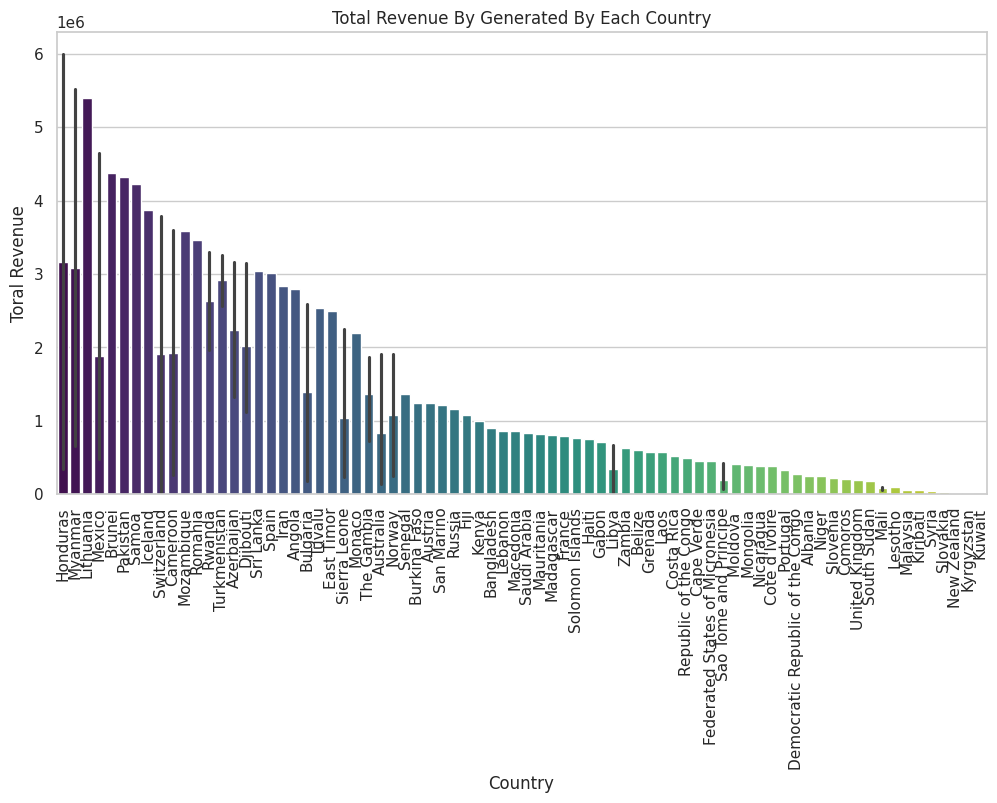

In [ ]:
# Sorting the country by total revenue for better visualiaztion

revenue_by_country=Amazon_sales_data.sort_values(by='Total Revenue',ascending=False)
revenue_by_country

# Plotting the total revenue by country
plt.figure(figsize=(12,6))
sns.barplot(x='Country',y='Total Revenue',data=revenue_by_country, palette='viridis')
plt.title('Total Revenue By Generated By Each Country')
plt.xlabel('Country')
plt.ylabel('Toral Revenue')
plt.xticks(rotation=90)
plt.show()

**Observations :**



*   Maximum revenue generated by Honduras.
*  Minimum revenue generated  by Kuwait



### **Total Revenue Distribution by Region**

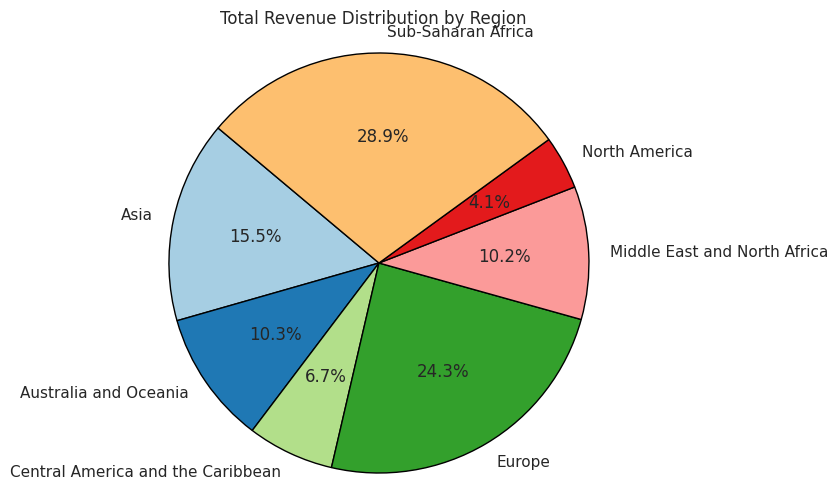

In [ ]:
# Sum of total revenue by each region
revenue_by_region = Amazon_sales_data.groupby('Region')['Total Revenue'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(revenue_by_region))),
        wedgeprops={'edgecolor': 'black'})
plt.title('Total Revenue Distribution by Region  ')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

**Observations :**



*   Maximum revenue generated by Sub suharan Africa : 29.9%
*   Minimum revenue generated by North America : 4.1%



### **Total Revenue Distribution by Order Priority**

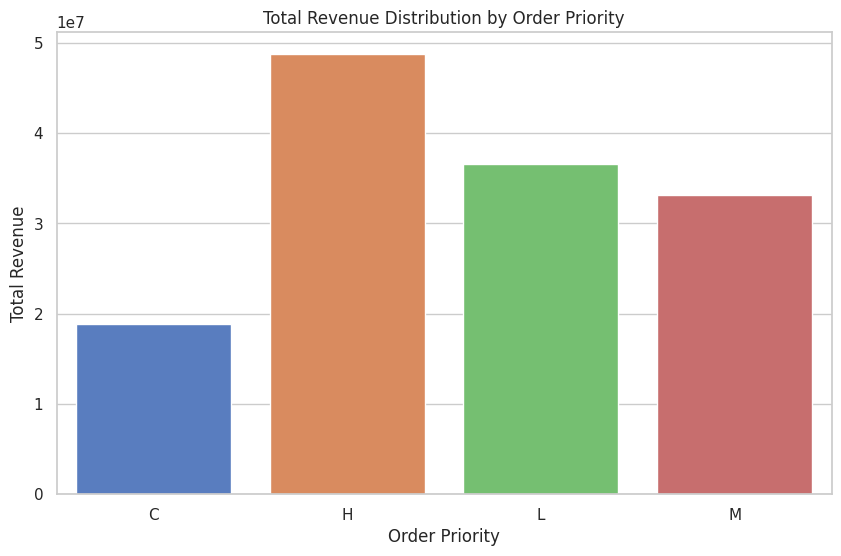

In [ ]:
# Aggregate total revenue by order priority
revenue_by_priority = Amazon_sales_data.groupby('Order Priority')['Total Revenue'].sum().reset_index()

# Plotting the total revenue by order priority
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_priority, x='Order Priority', y='Total Revenue', palette='muted')
plt.title('Total Revenue Distribution by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()

**Observations :**



*   Order priority "H" contributes the most to revenue.
*  Order priority "C" contributes the least to revenue.



### **Count of Order Priority**

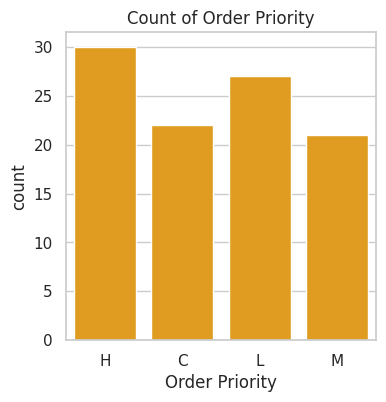

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="Order Priority",data =Amazon_sales_data ,color="orange")
plt.title("Count of Order Priority")
plt.savefig("count of Order Priority.jpg")
plt.show()


**Observations:**



*   High priority orders have the highest count, indicating that a significant number of orders are given high priority.
*  Low priority orders also have a relatively high count, slightly less than high priority orders.



### **Distribution of Order Priority by Sales Channel**

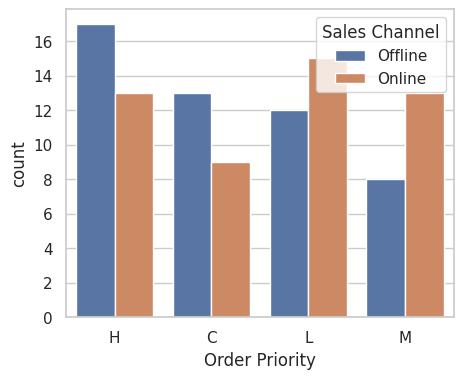

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority',data= Amazon_sales_data,hue="Sales Channel")
plt.show()

**Observations:**



*   H has a stronger presence in offline sales.
*   L shows a higher contribution in online sales.



In [ ]:
#Aggregate Data For yearly_monthly profit margin
monthly_profit_margin=Amazon_sales_data.groupby("Order_Year_Month").agg({"Profit_margin":"mean"}).reset_index()
monthly_profit_margin=monthly_profit_margin.sort_values(by='Profit_margin',ascending=False)


### **Yearly-Monthly Net Profit Margin Distribution**

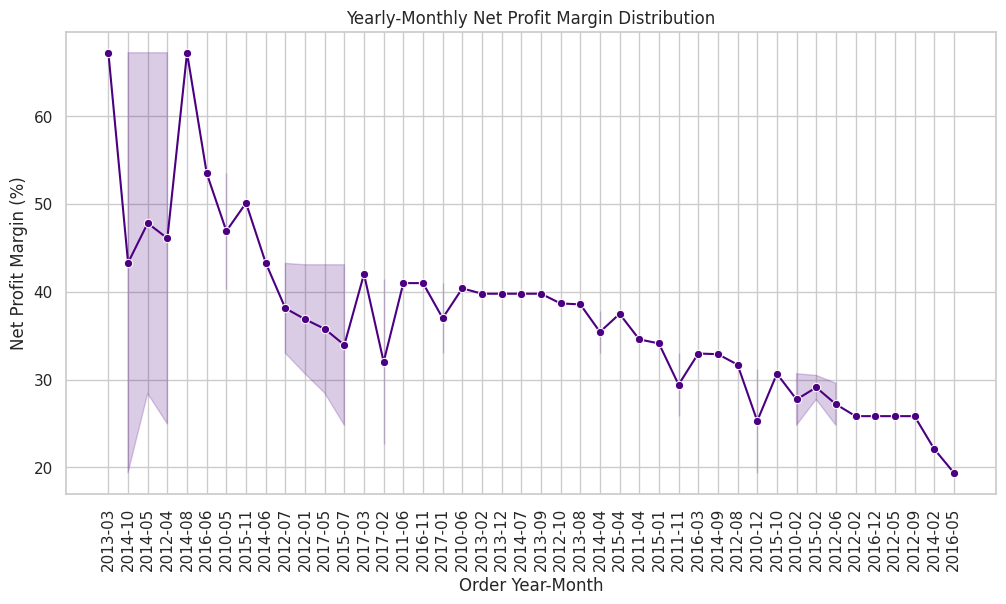

In [ ]:
# Converting Order_Year_month to string for plotting
monthly_profit_margin['Order_Year_Month']=Amazon_sales_data['Order_Year_Month'].astype(str)

#Plotting Yearly-Monthly profit margin

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit_margin,x="Order_Year_Month",y="Profit_margin",color='indigo',marker="o")
plt.title('Yearly-Monthly Net Profit Margin Distribution')
plt.xlabel('Order Year-Month')
plt.ylabel('Net Profit Margin (%)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Observations:**



*   March 2013 and August 2014 marked the company's highest profitability, suggesting effective strategies or favorable market conditions.
*   Analyzing these periods can provide valuable insights into the factors that drove success, helping to inform future business strategies.



### **Net Profit Margin(%)**

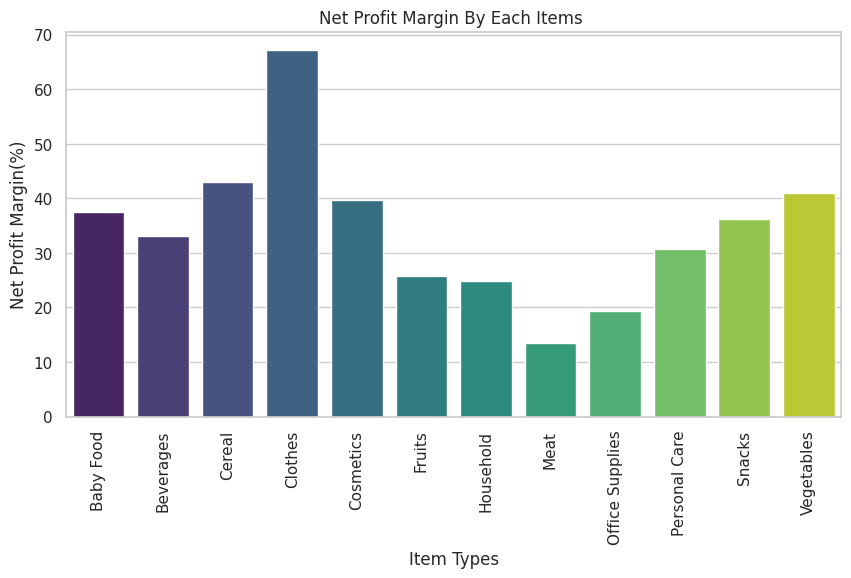

In [ ]:
item_profit_margin=Amazon_sales_data.groupby('Item Type').agg({"Profit_margin":"mean"}).reset_index()
# plotting profit margins by each items
plt.figure(figsize=(10,5))
sns.barplot(data=item_profit_margin,x="Item Type",y="Profit_margin",palette='viridis')
plt.title("Net Profit Margin By Each Items ")
plt.xlabel("Item Types")
plt.ylabel("Net Profit Margin(%)")
plt.xticks(rotation=90)
plt.show()

**Observations :**



*   Between 2010 and 2017, the highest profit margin was achieved on clothes.
*   During the same period, the lowest profit margin was recorded for meat.









### **Net Profit Margins By Sales**

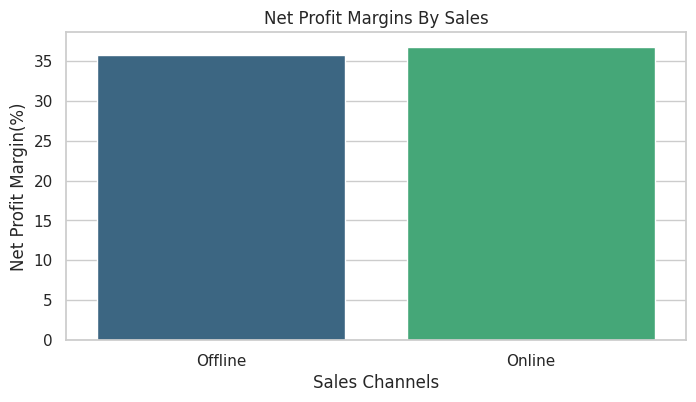

In [ ]:
#Aggregating data for profit margins of sales channels
channel_profit_margin=Amazon_sales_data.groupby("Sales Channel").agg({"Profit_margin":"mean"}).reset_index()
# plotting profit margins for sales channels
plt.figure(figsize=(8,4))
sns.barplot(data=channel_profit_margin,x='Sales Channel',y='Profit_margin',palette='viridis')
plt.title('Net Profit Margins By Sales')
plt.xlabel('Sales Channels')
plt.ylabel('Net Profit Margin(%)')
plt.show()

**Observations:**

As per observation total profit margin recursively increasing from offline sales channel to online sales channel between the year 2010 -2017

In [ ]:
Amazon_sales_data['Shipping_Duration']=(Amazon_sales_data['Ship Date']-Amazon_sales_data['Order Date']).dt.days
monthly_ship_duration=Amazon_sales_data.groupby("Order_Year_Month").agg({"Shipping_Duration":"mean"}).reset_index()
monthly_ship_duration=monthly_ship_duration.sort_values(by='Shipping_Duration',ascending=False)


### **Monthly Average Shipping Duration**

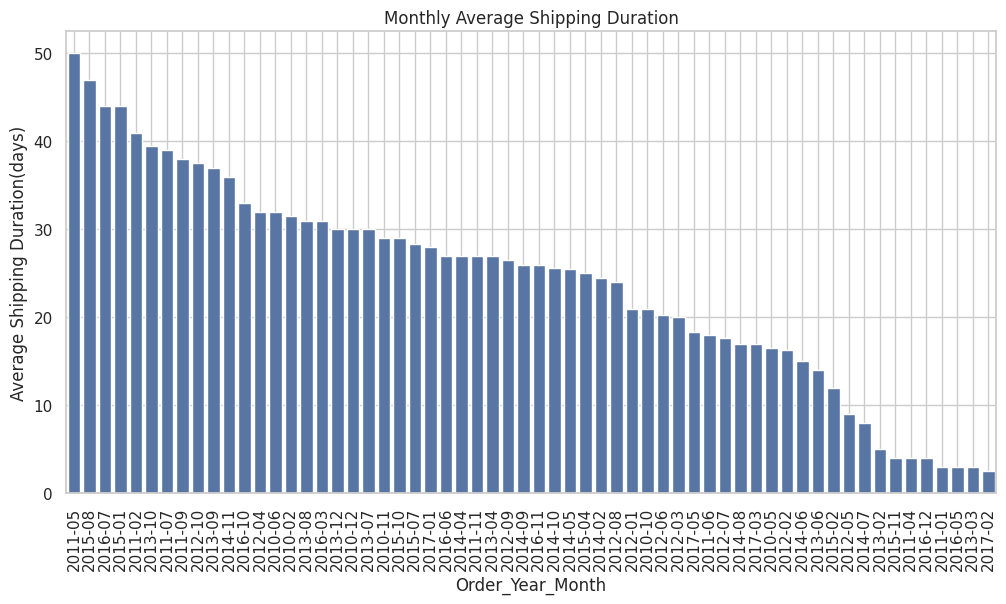

In [ ]:
# Plotting Monthly Shipping Duration

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_ship_duration,x='Order_Year_Month',y='Shipping_Duration')
plt.title('Monthly Average Shipping Duration')
plt.xlabel('Order_Year_Month')
plt.ylabel('Average Shipping Duration(days)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Observations:**



*  The average shipping duration tends to be higher during certain months, likely correlating with peak shopping periods such as May, July, and August.
*   Months like January, February, and March often show shorter average shipping durations.






### **Average % Shipping Duration by Each Sales Channel**

Text(0.5, 1.0, 'Average% Shipping Duration by Each Sales Channel')

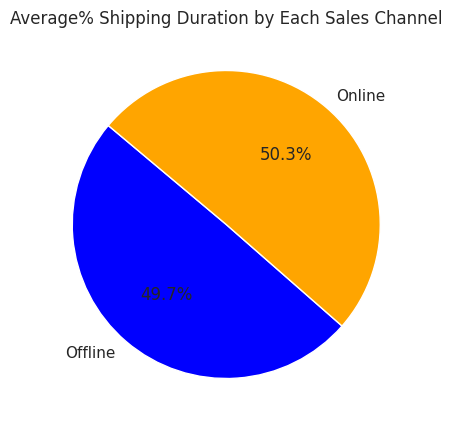

In [ ]:
# aggregration of sales channels for average shipping
channel_ship_duration=Amazon_sales_data.groupby("Sales Channel").agg({"Shipping_Duration":"mean"}).reset_index()

# Plotting Average Shipping Duration by sales channels by pie chart
plt.figure(figsize=(10,5))
plt.pie(channel_ship_duration["Shipping_Duration"],labels=channel_ship_duration["Sales Channel"],
       autopct='%1.1f%%',startangle=140,colors=['blue','orange'])
plt.title('Average% Shipping Duration by Each Sales Channel')

**Observations:**



   

*   The average shipping duration is slightly longer for online orders compared to offline orders.

*   This suggests that online orders may involve more steps or additional processing time.






### **Average Shipping Duration by Each Region**

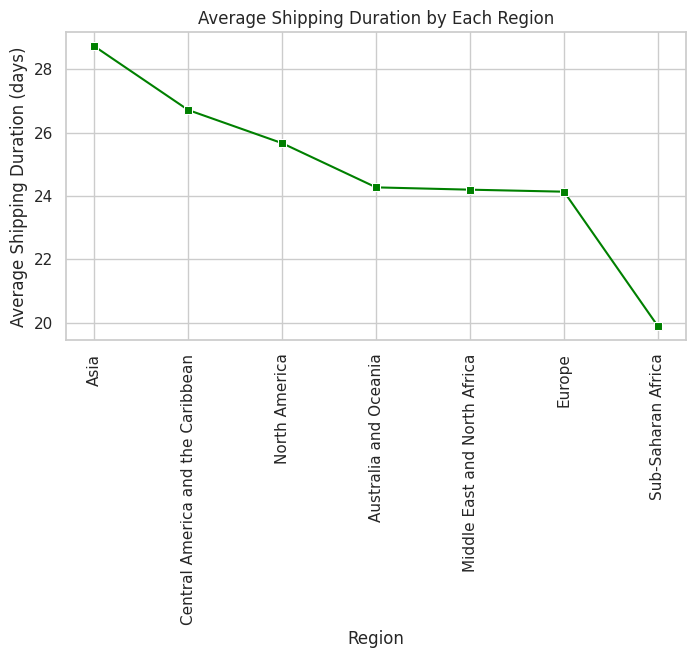

In [ ]:
#Aggregate region for average shipping duration
re_ship_duration=Amazon_sales_data.groupby("Region").agg({"Shipping_Duration":"mean"}).reset_index()
re_ship_duration=re_ship_duration.sort_values(by='Shipping_Duration',ascending=False)

# plotting average shipping duration by region

plt.figure(figsize=(8,4))
sns.lineplot(data=re_ship_duration,x="Region",y="Shipping_Duration",color='green',marker='s')
plt.title('Average Shipping Duration by Each Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Duration (days)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


**Observations :**



*  The graph indicates significant variations in shipping durations across different regions.

*   For instance, Sub-Saharan Africa exhibits the shortest shipping durations, suggesting an efficient logistics and distribution network within this region.



### **Average Shipping Duration by Order Priority**

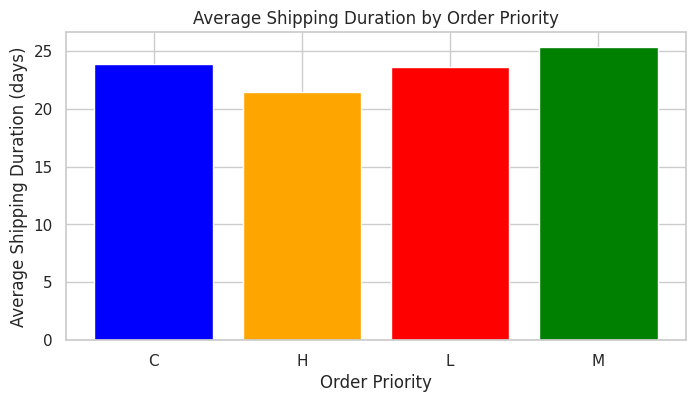

In [ ]:
pri_ship_du=Amazon_sales_data.groupby("Order Priority").agg({"Shipping_Duration":"mean"}).reset_index()
# plotting average shipping duration by order priority
plt.figure(figsize=(8,4))
plt.bar(pri_ship_du["Order Priority"],pri_ship_du["Shipping_Duration"],color=['blue','orange','red','green'])
plt.title('Average Shipping Duration by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Duration (days)')
plt.grid(True)
plt.show()


**Observations :**





*   The data shows that high-priority orders (H) have the shortest average shipping duration.
*   This indicates that high-priority orders are processed and shipped more quickly.





# **Conclusion**

Based on the comprehensive data analysis, we can conclude that effective sales management plays a pivotal role in navigating competitive markets and optimizing distribution strategies to enhance profitability and reduce costs. The distinct performance trends in offline and online sales channels highlight the need for tailored approaches to maximize revenue across both platforms. By leveraging the strengths of various regions and understanding product-specific contributions, companies can devise more precise marketing and sales strategies.

Moreover, the correlation between order prioritization and shipping efficiency underscores the importance of streamlined logistics in improving customer satisfaction. Recognizing peak periods of profitability and sales can provide valuable insights for future strategic planning. Therefore, it is crucial to employ data-driven decision-making, enhance logistical operations, and customize marketing initiatives based on regional and product-specific insights. This approach will not only address the challenges of increasing competition and distribution costs but also drive sustained growth and profitability in the long term.

